<a href="https://colab.research.google.com/github/gumparlapatinavyasri/CodeAlpha_exploratorydataanalysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/sample_data/Smartphones_cleaned_dataset.csv")
print(df.shape)
df.info()
df.describe()

(980, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null 

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


Text(0.5, 1.0, 'Price vs Rating')

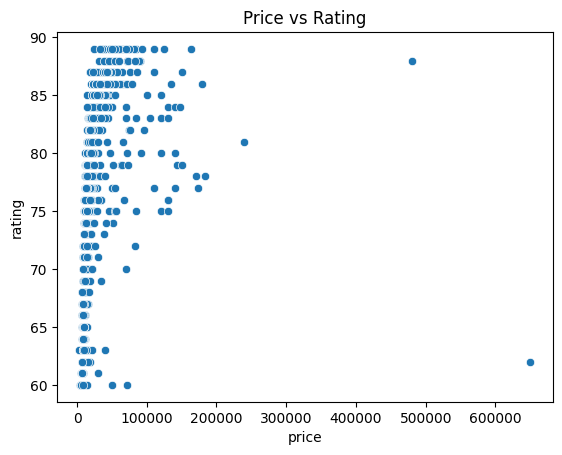

In [4]:
sns.scatterplot(x='price', y='rating', data=df)
plt.title("Price vs Rating")



<Axes: xlabel='fast_charging', ylabel='Count'>

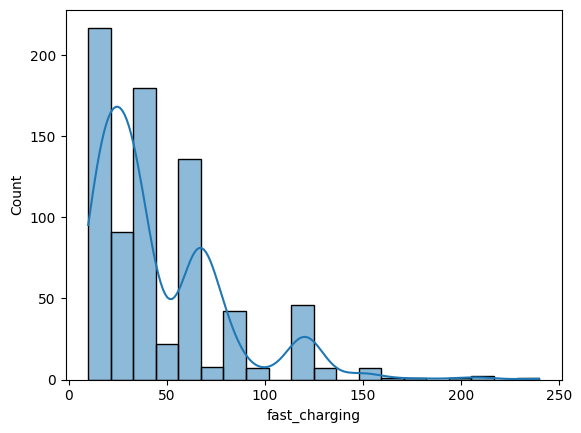

In [5]:
sns.histplot(df['fast_charging'], bins=20, kde=True)


<Axes: xlabel='os'>

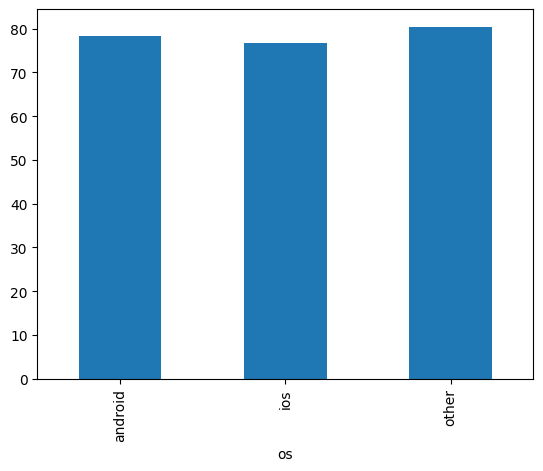

In [6]:
df.groupby('os')['rating'].mean().plot(kind='bar')



<Axes: xlabel='brand_name'>

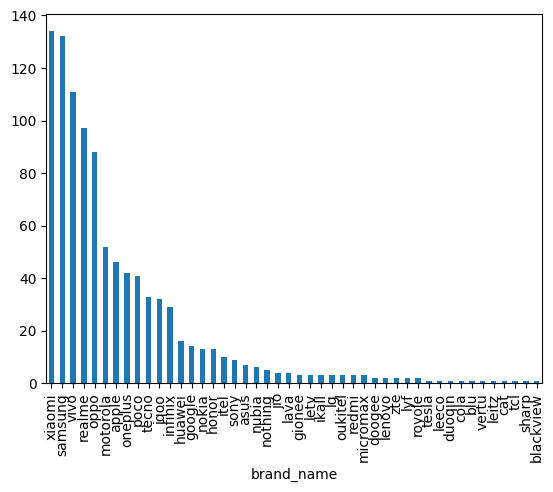

In [7]:
df['brand_name'].value_counts().plot(kind='bar')


In [8]:
from scipy.stats import ttest_ind
fast = df[df['fast_charging'] > 65]['rating'].dropna()
slow = df[df['fast_charging'] <= 65]['rating'].dropna()
ttest_ind(fast, slow)

TtestResult(statistic=np.float64(11.809302995132862), pvalue=np.float64(1.7381752594958728e-29), df=np.float64(703.0))

In [10]:
# Missing data
df.isnull().sum()



,0
brand_name,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,20
num_cores,6
processor_speed,42


In [11]:
# Duplicate models
df.duplicated(subset=['model']).sum()


np.int64(0)

<Axes: >

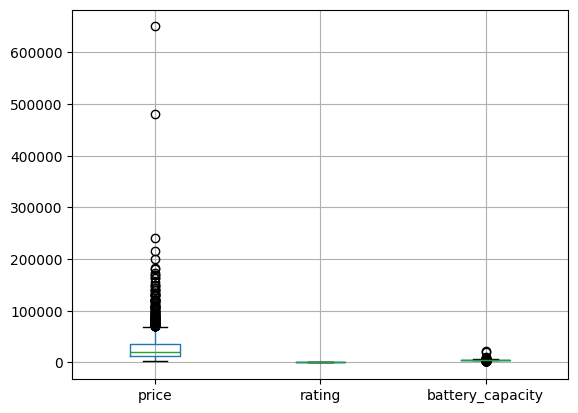

In [12]:
df[['price', 'rating', 'battery_capacity']].boxplot()
